In [1]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [25]:
#import the two dataframes
df1 = pd.read_csv("../input/Train_call.txt", delimiter="\t")
df2 = pd.read_csv("../input/Train_clinical.txt", delimiter="\t")

In [26]:
#explore df1
df1.sample(10)

,Chromosome,Start,End,Nclone,Array.129,Array.34,Array.67,Array.24,Array.22,Array.36,...,Array.64,Array.89,Array.30,Array.35,Array.93,Array.10,Array.123,Array.100,Array.134,Array.130
2348,17,65857197,66108544,12,0,0,-1,1,0,-1,...,0,0,0,0,0,-1,1,0,1,0
1506,11,68142018,68367037,26,-1,1,0,0,0,-1,...,0,0,0,0,0,0,0,0,1,0
2822,23,145164724,149589730,314,2,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
204,1,157779753,158111315,62,1,0,0,-1,1,0,...,1,1,1,0,1,1,-1,0,1,1
464,3,144727213,153247166,598,0,0,0,0,1,0,...,1,0,1,1,1,0,0,0,1,0
2026,16,69763173,70593293,100,1,0,-1,0,-1,0,...,0,0,1,-1,0,0,-1,0,-1,1
634,5,17570523,17719479,9,1,0,0,0,-1,0,...,1,0,1,0,0,0,0,0,0,0
1934,15,81362293,82546736,140,0,0,-1,0,0,0,...,0,0,0,1,0,0,-1,0,0,0
2160,17,31182810,31330891,23,-1,0,-1,-1,0,2,...,0,0,0,0,0,-1,0,0,1,-1
943,7,57518513,61275990,7,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [39]:
count = 0
for i in range(df1.shape[0]):
    if df1.Chromosome[i] == 23:
        count+=1
print(count)

74


In [4]:
#the names of the columns
list(df1.columns.values)

['Chromosome',
 'Start',
 'End',
 'Nclone',
 'Array.129',
 'Array.34',
 'Array.67',
 'Array.24',
 'Array.22',
 'Array.36',
 'Array.49',
 'Array.16',
 'Array.146',
 'Array.143',
 'Array.65',
 'Array.62',
 'Array.4',
 'Array.76',
 'Array.118',
 'Array.154',
 'Array.48',
 'Array.6',
 'Array.39',
 'Array.86',
 'Array.112',
 'Array.79',
 'Array.124',
 'Array.19',
 'Array.27',
 'Array.106',
 'Array.110',
 'Array.69',
 'Array.73',
 'Array.95',
 'Array.98',
 'Array.17',
 'Array.33',
 'Array.138',
 'Array.149',
 'Array.101',
 'Array.90',
 'Array.99',
 'Array.57',
 'Array.105',
 'Array.85',
 'Array.114',
 'Array.56',
 'Array.5',
 'Array.8',
 'Array.113',
 'Array.148',
 'Array.42',
 'Array.25',
 'Array.102',
 'Array.55',
 'Array.141',
 'Array.43',
 'Array.159',
 'Array.52',
 'Array.88',
 'Array.125',
 'Array.152',
 'Array.50',
 'Array.23',
 'Array.68',
 'Array.94',
 'Array.153',
 'Array.51',
 'Array.142',
 'Array.144',
 'Array.37',
 'Array.78',
 'Array.18',
 'Array.82',
 'Array.75',
 'Array.139',

In [5]:
#explore df2
df2.head()

,Sample,Subgroup
0,Array.129,HER2+
1,Array.34,HR+
2,Array.67,HR+
3,Array.24,Triple Neg
4,Array.22,Triple Neg


In [6]:
#transpose the df1
df1_transposed = df1.T

In [7]:
df1_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
Chromosome,1,1,1,1,1,1,1,1,1,1,...,23,23,23,23,23,23,23,23,23,23
Start,2927,85022,370546,471671,792533,912799,1271190,1676445,1738295,2481927,...,151067607,152422390,152552851,152576854,152994680,153062077,153466463,153504394,153938998,153997146
End,43870,216735,372295,786483,907406,1266212,1590570,1703748,2477597,2562342,...,152416606,152548587,152570071,152935130,153054487,153452633,153491568,153933426,153989329,154492924
Nclone,3,4,4,5,13,96,45,4,104,14,...,159,20,6,64,5,57,4,55,5,43
Array.129,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1


### df1
#### For df1, chromosome, start, end and #clone are self explanatory. The number of arrays varies and 100 are incuded. Arrays value is [-1, 0, 1, 2]. (-1: loss, 0: normal, 1: gain, 2: amplification (++gain)).
### df2
#### df2 assigns a certain array to a subgroup of breast cancer. The subtypes are three: HER2+, HR+, TN.


In [8]:
#check the values for each array
def value_of_arrays(x):
    '''
    x: number of array
    output: name of the array, the numbers for loss, normal, gain, amplification
    and the group of breast cancer
    '''
    loss = norm = gain = dgain = 0
    values_array = [loss, norm, gain, dgain]
    
    #count all the array values
    for index, row in df1.iterrows():
        if row[x]== -1:
             values_array[0] += 1
        elif row[x]== 0:
            values_array[1] += 1
        elif row[x]== 1:
            values_array[2] += 1
        elif row[x]== 2:
            values_array[3] += 1
            
    #create the group of cancer type       
    for index, row in df2.iterrows():
        if row['Sample'] == df1.columns.values[x]:
            group = row['Subgroup']
        else:
            pass
    
    return df1.columns.values[x], values_array, group

In [52]:
#function for the amount of array values per chromosome
def array_values_per_chrom(chromosome):

    normal = loss = gain = dgain = count = 0
    for j in df1.columns.values:
        if j == "Chromosome" or j == "Start" or j == "End" or j == "Nclone":
            continue
        else:
            for i in range(df1.shape[0]):
                if df1.Chromosome[i] == chromosome:
                    if df1[j][i] == 0:
                        normal += 1
                    elif df1[j][i] == -1:
                        loss += 1
                    elif df1[j][i] == 1:
                        gain += 1
                    elif df1[j][i] == 2:
                        dgain += 1
                
                if df1.Chromosome[i] == chromosome:
                    count+=1
                        
    return loss, normal, gain, dgain, int(count/100)

In [53]:
for i in range(1, 24):
    print('chr'+str(i),array_values_per_chrom(i))

chr1 (4531, 14057, 8187, 325, 271)
chr2 (980, 7714, 1401, 5, 101)
chr3 (2008, 7804, 1958, 30, 118)
chr4 (2454, 8891, 1106, 49, 125)
chr5 (1914, 6205, 1816, 65, 100)
chr6 (4744, 9900, 3304, 152, 181)
chr7 (749, 6735, 2637, 79, 102)
chr8 (5136, 7882, 4569, 1713, 193)
chr9 (2367, 6038, 1226, 69, 97)
chr10 (2415, 7354, 1759, 72, 116)
chr11 (3472, 12146, 2936, 246, 188)
chr12 (1183, 7936, 2299, 82, 115)
chr13 (1863, 3894, 636, 7, 64)
chr14 (2408, 6469, 1581, 142, 106)
chr15 (1713, 4520, 823, 44, 71)
chr16 (1847, 5331, 2069, 53, 93)
chr17 (8919, 18399, 5965, 1117, 344)
chr18 (1620, 3175, 795, 10, 56)
chr19 (1427, 7284, 1629, 60, 104)
chr20 (1114, 6258, 3452, 276, 111)
chr21 (431, 2872, 994, 3, 43)
chr22 (1689, 3634, 772, 5, 61)
chr23 (161, 984, 5357, 898, 74)


In [11]:
#function for exploring the type of cancer correlated with their array values
def bcancer_type_arrays(ctype, amount = False, arrays = False):
    '''
    ctype: "Triple Neg", "HR+", "HER2+"
    '''
    loss = norm = gain = dgain = count = 0
    for i in range(4,df1.shape[1]):
        if value_of_arrays(i)[2] == ctype:
            if arrays == True:
                print(value_of_arrays(i))
            count +=1
            loss +=value_of_arrays(i)[1][0]
            norm +=value_of_arrays(i)[1][1]
            gain +=value_of_arrays(i)[1][2]
            dgain +=value_of_arrays(i)[1][3]
        else:
            pass
        #if value_of_arrays(i)
        
    if amount == True:
        print(count)
    return int(loss/count), int(norm/count), int(gain/count), int(dgain/count)  

In [12]:
bcancer_type_arrays("Triple Neg",True)

32


(592, 1530, 655, 55)

In [13]:
bcancer_type_arrays("HER2+",True)

32


(578, 1653, 538, 62)

In [14]:
bcancer_type_arrays("HR+",True)

36


(490, 1766, 529, 47)

### Based on the above you cannot reach a conclusion only by looking the array values

In [15]:
#find correlation between regions of DNA and values of array
def regions_DNA_values(x):
    '''
    x: number of column
    output: Chromosome, Start, End, Nclones, and array values
    '''
    loss = norm = gain = dgain = 0
    values_region = [loss, norm, gain, dgain]

    for index, row in df1_transposed.iterrows():
        if index == "Chromosome" or index == "Start" or index == "End" or index == "Nclone":
            continue
        else: 
            if row[x]== -1:
                values_region[0] += 1
            elif row[x]== 0:
                values_region[1] += 1
            elif row[x]== 1:
                values_region[2] += 1
            elif row[x]== 2:
                values_region[3] += 1
    return df1_transposed[x][0], df1_transposed[x][1], df1_transposed[x][2], df1_transposed[x][3], values_region

In [16]:
#for i in range(df1_transposed.shape[1]):
    print(regions_DNA_values(18))

(1, 2903052, 3112977, 27, [25, 67, 8, 0])


In [17]:
#count the number of clones
#maybe the amount of clones means more reliability
ufive = uten = utwenty = ufifty = uhundred = u2hundred = more = 0
Nclone = [ufive, uten, utwenty, ufifty, uhundred, u2hundred, more]
for i in range(0,2834):
    if regions_DNA_values(i)[3] <= 5:
        Nclone[0] +=1
    elif regions_DNA_values(i)[3] <= 10:
        Nclone[1] +=1
    elif regions_DNA_values(i)[3] <= 20:
        Nclone[2] +=1
    elif regions_DNA_values(i)[3] <= 50:
        Nclone[3] +=1
    elif regions_DNA_values(i)[3] <= 100:
        Nclone[4] +=1
    elif regions_DNA_values(i)[3] <= 200:
        Nclone[5] +=1
    elif regions_DNA_values(i)[3] > 200:
        Nclone[6] +=1
    else:
        pass
print(Nclone)

[494, 269, 310, 501, 496, 451, 313]


In [21]:
def chromosome_array_values(array_value, threshold, plot = False):
    '''
    array_value: 0: -1 = loss, 1: 0 = normal, 2: 1 = gain, 3: 2 = 2gain
    threshold: number out of a hundred
    plot: True/False if you need a bar plot
    '''
    dic = {}
    one = two = three = four = five = six = seven = eight = nine = ten = eleven = twelve = thirteen = fourteen = 0
    fifteen = sixteen = seventeen = eighteen = nineteen = twenty = twentyone = twentytwo = twentythree = 0
    chrom = [one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, 
           fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twentyone, twentytwo, twentythree]
    keys = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
            '18', '19', '20', '21', '22', '23']
    
    #iterate throught all the given DNA regions 
    for i in range(0,df1_transposed.shape[1]):
        if regions_DNA_values(i)[4][array_value] > threshold:
            #assign the array values to each chromosome
            for chm in range(1,len(chrom)): 
                if regions_DNA_values(i)[0] == chm:
                    chrom[chm-1] += 1
                else:
                    pass
            if regions_DNA_values(i)[0] == 23: #hardcoded this part, caused I cannot fixed it else now
                    chrom[22] += 1
            print(regions_DNA_values(i))
        else:
            pass

    #create a dictionary to store the amount of array values per chromosome(key)
    for n in range(len(chrom)):
        dic[keys[n]] = chrom[n]
    
    #bar plot creation 
    if plot == True:
        plt.bar(range(len(dic)), list(dic.values()), align='center')
        plt.xticks(range(len(dic)), list(dic.keys()))
        plt.show()
    else:
        pass

    return dic

(1, 2611444, 2641811, 12, [4, 40, 52, 4])
(1, 2882919, 2901629, 9, [5, 38, 53, 4])
(1, 142570866, 142598507, 4, [6, 39, 55, 0])
(1, 142610589, 142871406, 4, [5, 41, 54, 0])
(1, 142877399, 143526765, 60, [4, 34, 61, 1])
(1, 143543580, 144966156, 111, [3, 35, 60, 2])
(1, 144975464, 145023947, 3, [5, 35, 59, 1])
(1, 145647143, 145716245, 2, [4, 39, 57, 0])
(1, 146473741, 146512434, 3, [9, 40, 51, 0])
(1, 146525071, 146549143, 3, [8, 33, 58, 1])
(1, 146581869, 146634734, 4, [3, 33, 62, 2])
(1, 146661770, 149362629, 356, [2, 32, 65, 1])
(1, 149403519, 149573806, 31, [2, 28, 69, 1])
(1, 149579637, 149582884, 2, [2, 15, 75, 8])
(1, 149591108, 149598429, 2, [2, 19, 74, 5])
(1, 149604744, 150808620, 174, [2, 29, 68, 1])
(1, 150815602, 151998352, 164, [2, 27, 70, 1])
(1, 151998685, 152605084, 79, [2, 29, 68, 1])
(1, 152617283, 155145482, 300, [2, 29, 68, 1])
(1, 155152973, 156497370, 150, [2, 32, 65, 1])
(1, 156504203, 156715120, 31, [2, 30, 67, 1])
(1, 156722904, 157446463, 94, [2, 28, 69, 1])


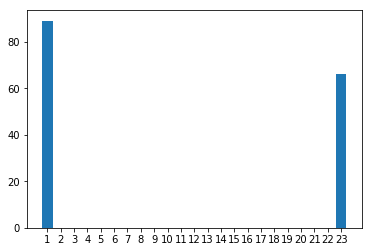

{'1': 89,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 '10': 0,
 '11': 0,
 '12': 0,
 '13': 0,
 '14': 0,
 '15': 0,
 '16': 0,
 '17': 0,
 '18': 0,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0,
 '23': 66}

In [23]:
chromosome_array_values(2, 50, True)

In [24]:
#for each chromosome print the array values
chrloss = chrnorm = chrgain = chrdgain = count = 0
for i in range(df1_transposed.shape[1]):
    if i == 0:
        chrloss +=regions_DNA_values(i)[4][0]
        chrnorm +=regions_DNA_values(i)[4][1]
        chrgain +=regions_DNA_values(i)[4][2]
        chrdgain +=regions_DNA_values(i)[4][3]
        count +=1
    elif i == df1_transposed.shape[1]-1:
        print('chr'+str(regions_DNA_values(i)[0]), int(chrloss/count), int(chrnorm/count), int(chrgain/count), int(chrdgain/count))
    elif regions_DNA_values(i)[0] == regions_DNA_values(i-1)[0]:
        chrloss +=regions_DNA_values(i)[4][0]
        chrnorm +=regions_DNA_values(i)[4][1]
        chrgain +=regions_DNA_values(i)[4][2]
        chrdgain +=regions_DNA_values(i)[4][3]
        count +=1
    elif regions_DNA_values(i)[0] != regions_DNA_values(i-1)[0]:
        print('chr'+str(regions_DNA_values(i-1)[0]), int(chrloss/count), int(chrnorm/count), int(chrgain/count), int(chrdgain/count))
        chrloss = chrnorm = chrgain = chrdgain = count = 0
    else:
        print("unexpected")

chr1 16 51 30 1
chr2 9 76 13 0
chr3 16 66 16 0
chr4 19 71 8 0
chr5 19 62 18 0
chr6 26 54 18 0
chr7 7 66 25 0
chr8 26 40 23 8
chr9 24 62 12 0
chr10 20 63 15 0
chr11 18 64 15 1
chr12 10 68 19 0
chr13 29 60 9 0
chr14 22 60 14 1
chr15 24 63 11 0
chr16 20 57 22 0
chr17 25 53 17 3
chr18 28 56 14 0
chr19 13 70 15 0
chr20 9 56 31 2
chr21 10 66 23 0
chr22 28 59 12 0
chr23 2 12 72 12


# Research questions:
## 1) Assign a new array to a certain cancer type.
## 2) Find out which regions are more responsible for certain cancer types than others.
## 3) Find out which chromosomes are more responsible for certain cancer types than others (maybe too simple).
## 4) Identify correlation between regions.

In [ ]:
# check if regions overlap

In [ ]:
# check for each cancer subtype the array values

def array_value_type(ctype, ):
    '''
    ctype: "Triple Neg", "HR+", "HER2+"
    
    '''